In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats
sns.set(style = 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Read and Explore

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info() ### right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
print(len(df["Loan_ID"].unique().tolist())) ### drop the unwanted Columns
df.drop(['Loan_ID'] , axis = 1 , inplace = True)
df

614


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Visualization

In [6]:
numerical_features = df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
categorical_features = df[["Gender" ,"Married" , "Dependents","Education" , "Self_Employed" , "Property_Area",'Credit_History','Loan_Status']]
categorical_features['Credit_History'] = categorical_features['Credit_History'].apply(lambda x : 'Yes' if x == 1.0 else 'No')
def Barh(df,features,bins=5):
    fig, ax = plt.subplots(len(features),1,figsize = (20, 20))
    fig.tight_layout(h_pad=5)
    for i in range(len(features)):
        ax[i].set_title(f"Top {features[i]}s ",fontsize=20)
        ax[i].tick_params(axis='both', which='major', labelsize=20)
        df[features[i]].value_counts()[bins:0:-1].plot(kind = 'barh',ax=ax[i])
        
def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
               
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(20,5))
    ax.set_title(str(feature),fontsize=18)
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()

- Univariate Analysis --> Numerical: Distribution

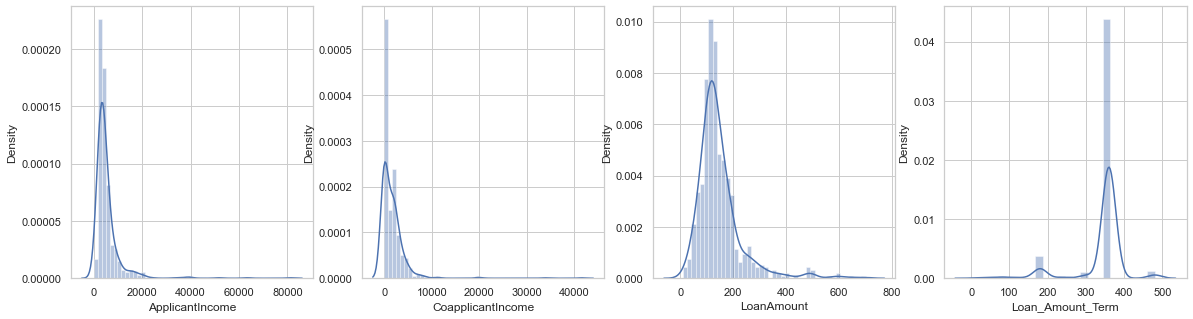

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 5))
for i, column in enumerate(numerical_features.columns):
    sns.distplot(numerical_features[column],ax=axes[i])

- Univariate Analysis --> Numerical: Outliers Detection

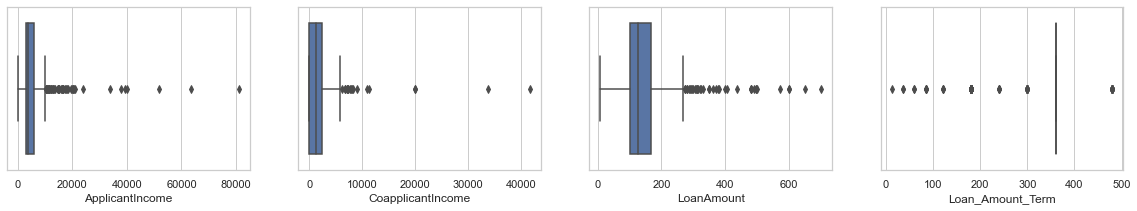

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 3))
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(numerical_features[column],ax=axes[i])

- Bivariate Analysis --> Numerical & Numerical: Correlation 

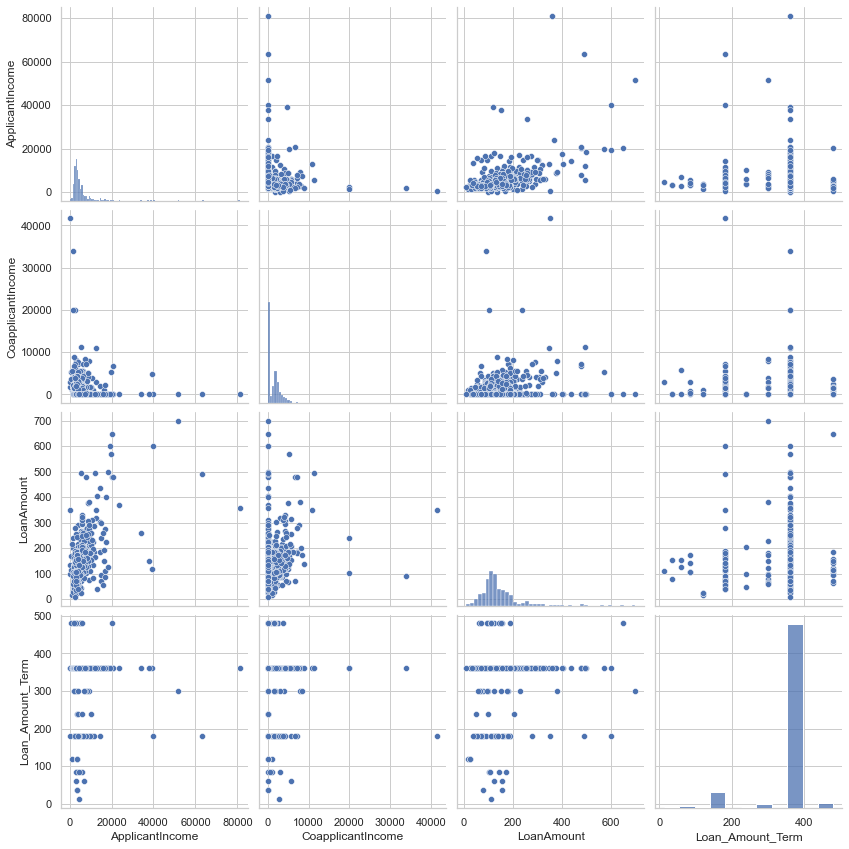

In [9]:
sns.pairplot(data = numerical_features,height=3)

- Univariate Analysis --> Categorical : Balanceability

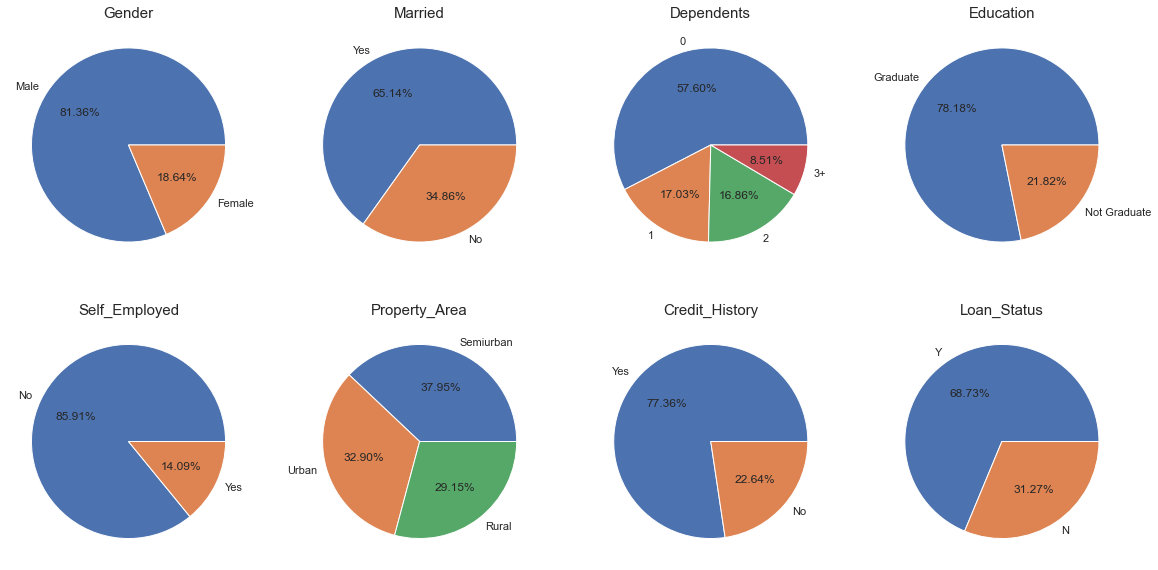

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(categorical_features.columns):
    axes[i//4,i%4].set_title(str(column),fontsize=15)
    axes[i//4,i%4].pie(categorical_features[column].value_counts()[:10],
                       labels=list(categorical_features[column].value_counts()[:10].index),
                       autopct ='%1.2f%%' , labeldistance = 1.1,)

- Bivariate Analysis --> Numerical & Categorical: Relations

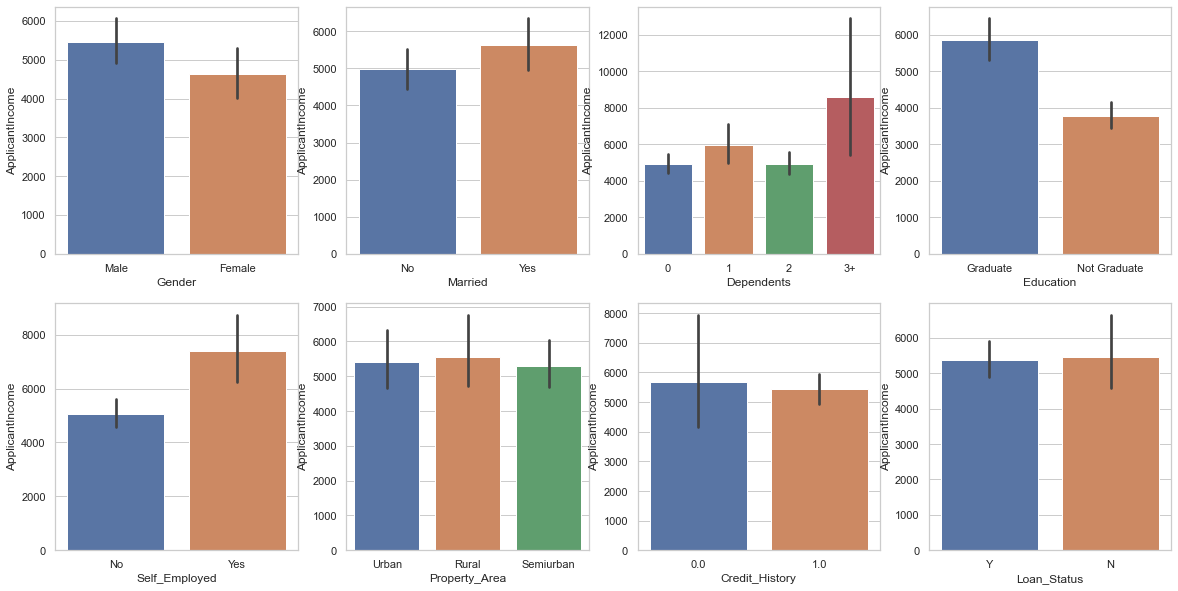

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(categorical_features.columns):
    sns.barplot(x=categorical_features.columns[i], y=numerical_features.columns[0], data=df,ax=axes[i//4,i%4])

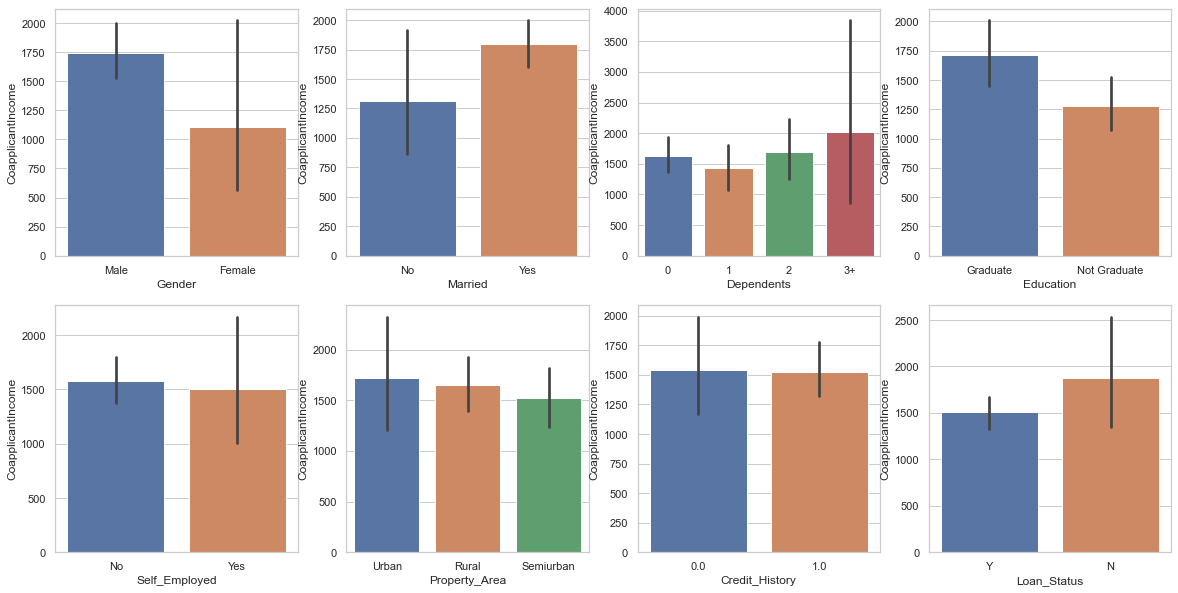

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(categorical_features.columns):
    sns.barplot(x=categorical_features.columns[i], y=numerical_features.columns[1], data=df,ax=axes[i//4,i%4])

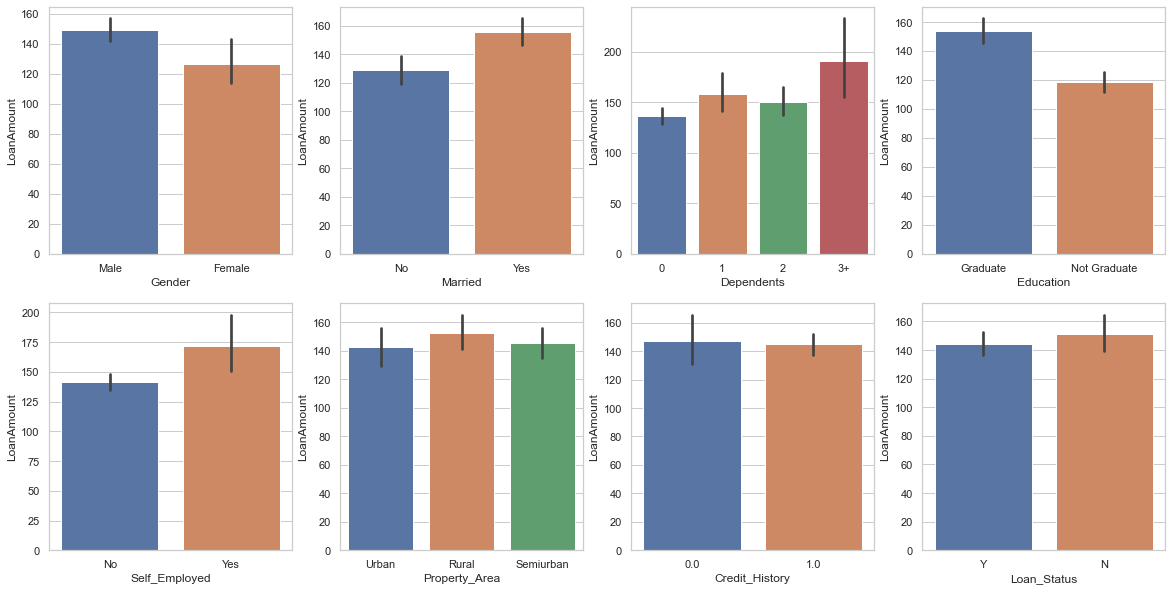

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(categorical_features.columns):
    sns.barplot(x=categorical_features.columns[i], y=numerical_features.columns[2], data=df,ax=axes[i//4,i%4])

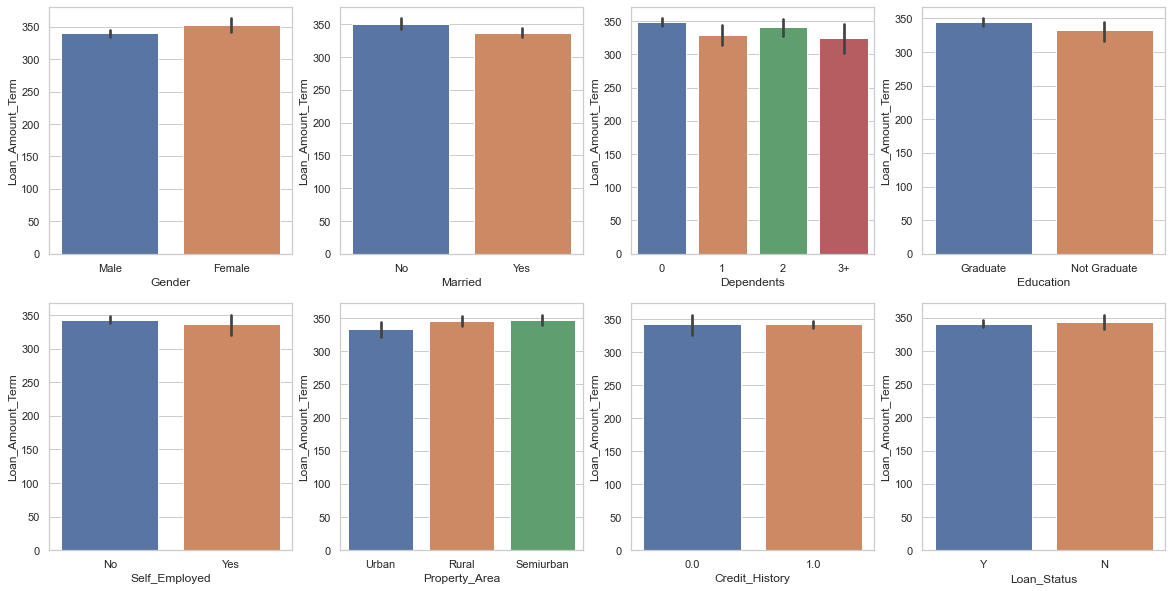

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize = (20, 10))
for i, column in enumerate(categorical_features.columns):
    sns.barplot(x=categorical_features.columns[i], y=numerical_features.columns[3], data=df,ax=axes[i//4,i%4])

- questions

<AxesSubplot:title={'center':'Top Loan_Amount_Terms '}>

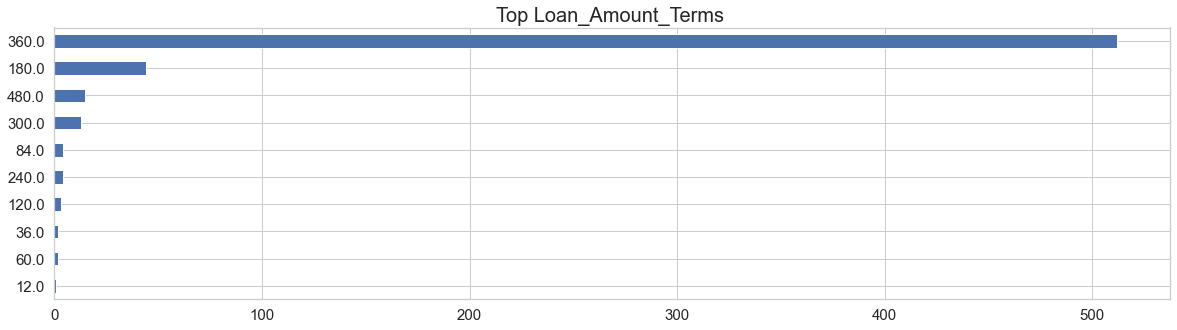

In [15]:
fig, ax = plt.subplots(1,1,figsize = (20, 5))
ax.set_title(f"Top Loan_Amount_Terms ",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
df['Loan_Amount_Term'].value_counts().sort_values().plot(kind = 'barh', ax=ax)

In [16]:
categorical_features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Status'],
      dtype='object')

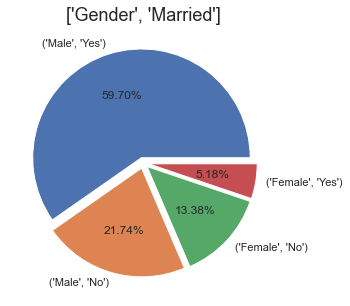

In [17]:
Pie(categorical_features,['Gender', 'Married'])

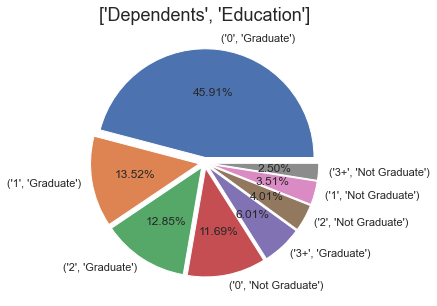

In [18]:
Pie(categorical_features,['Dependents', 'Education'])

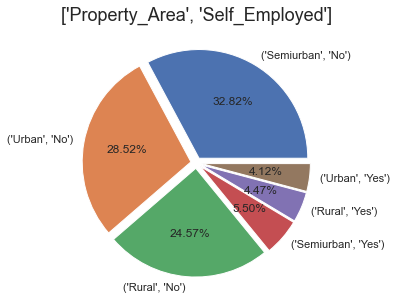

In [19]:
Pie(categorical_features,['Property_Area', 'Self_Employed'])

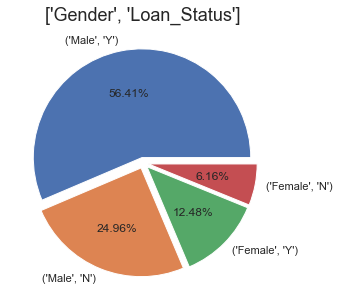

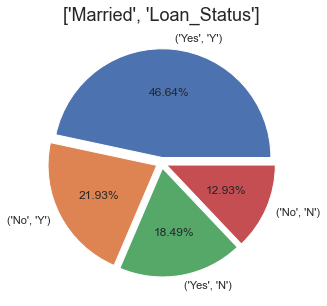

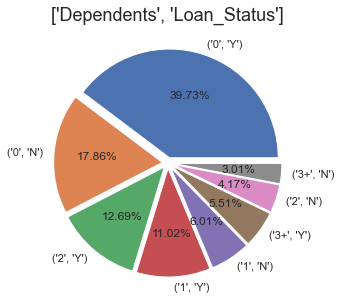

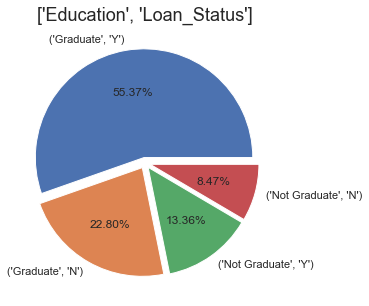

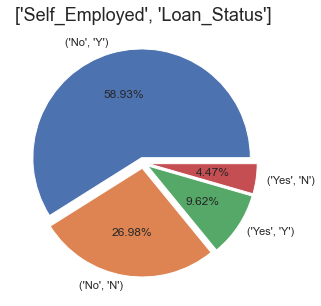

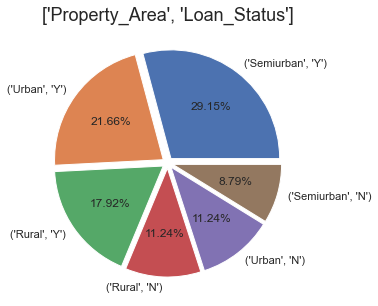

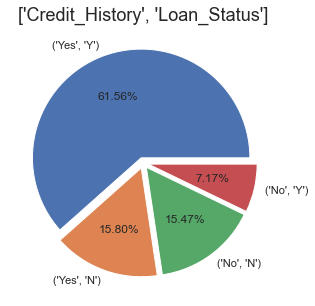

In [20]:
for c in categorical_features.columns:
    if c == 'Loan_Status':
        break 
    Pie(categorical_features,[c, 'Loan_Status'])

# Deal With Duplicated & Null Values

In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()
#df.dropna(inplace=True)
#df.reset_index(inplace=True)
#df.drop(['index'],axis = 1,inplace=True)
#df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Feture Selection

<AxesSubplot:>

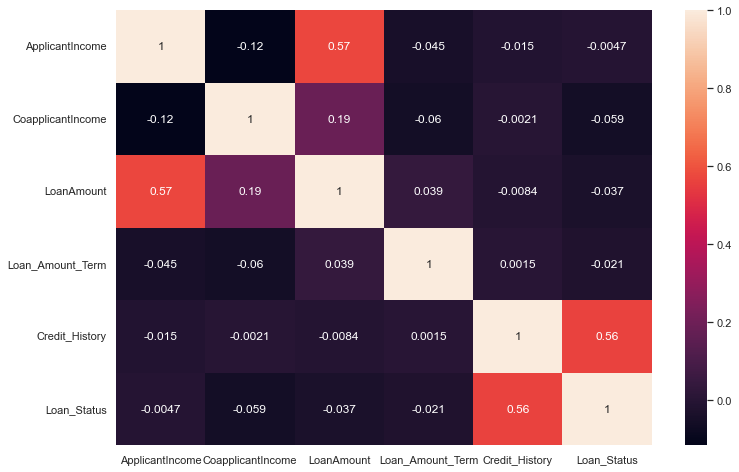

In [23]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : 1 if x == 'Y' else 0)
sns.set(rc={'figure.figsize':(12,8)},font_scale=1)
sns.heatmap(df.corr(),annot=True)

In [24]:
#df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'] , axis = 1 , inplace = True)
df = df[df['Credit_History'].notnull()]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


## Deal With Outliers

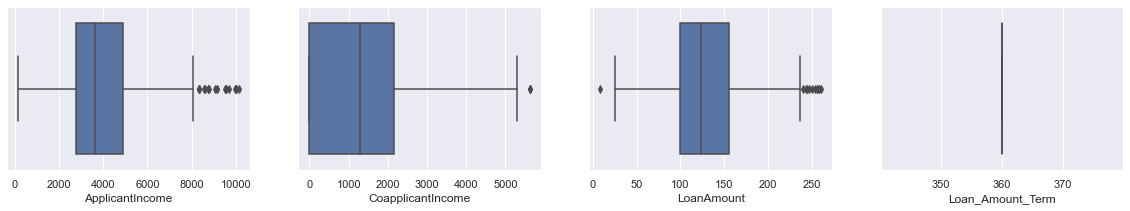

In [25]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
df.shape
df = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) |(df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.reset_index(drop=True, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (20, 3))
for i, column in enumerate(numerical_features.columns):
    sns.boxplot(df[column],ax=axes[i])

# Model Selection

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders.binary import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn import set_config
set_config(display='diagram')

In [31]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [32]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

categorical_features = ["Gender" , "Married" , "Dependents","Education" , "Self_Employed" , "Property_Area",'Credit_History']
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("OHE" , OneHotEncoder(sparse=False , drop="first")) ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed', 'Property_Area',
                                  'Credit_History'])])

In [33]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("SVM" , SVC()))
models.append(("KNN" , KNeighborsClassifier()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("gb" , GradientBoostingClassifier()))
models.append(("xg" , XGBClassifier()))
models.append(("gnb" , GaussianNB()))
models.append(("abc" , AdaBoostClassifier()))

In [34]:
select_from_model = SelectFromModel(RandomForestClassifier(), threshold='mean')
select_from_model

SelectFromModel(estimator=RandomForestClassifier(), threshold='mean')

In [44]:
for model in models:
    steps = list()
    steps.append(("preprocessor" , preprocessor))   
    steps.append(('over', SMOTE(random_state=1)))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(('select_from_model', select_from_model))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , x , y , scoring=["accuracy","f1"]  ,cv = 10 , return_train_score=True)
    print(model[0])
    print("Train_accuracy" , scores["train_accuracy"].mean() )
    print("Train_f1" , scores["train_f1"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_accuracy"].mean())
    print("Test_f1" , scores["test_f1"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.8310919853136213
Train_f1 0.8897396578298962
----------
Test_accuracy 0.8170542635658915
Test_f1 0.8802942435199084
--------------------


SVM
Train_accuracy 0.8368967346539906
Train_f1 0.8922435478339679
----------
Test_accuracy 0.805204872646733
Test_f1 0.8706593683955349
--------------------


KNN
Train_accuracy 0.8667259985201937
Train_f1 0.9044543649490782
----------
Test_accuracy 0.7814507198228129
Test_f1 0.8441556968544658
--------------------


CART
Train_accuracy 1.0
Train_f1 1.0
----------
Test_accuracy 0.7576411960132889
Test_f1 0.823227035729112
--------------------


RF
Train_accuracy 1.0
Train_f1 1.0
----------
Test_accuracy 0.8124031007751938
Test_f1 0.8717184660031743
--------------------


gb
Train_accuracy 0.9340236768996663
Train_f1 0.9547731924748148
----------
Test_accuracy 0.8028239202657806
Test_f1 0.8651326275341542
--------------------


xg
Train_accuracy 0.9997354497354497
Train_f1 0.9998130841121495
----------
Test_accuracy 0.812292358803

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
steps = list()
steps.append(("preprocessor" , preprocessor))
steps.append(('over', SMOTE(random_state=1)))
steps.append(("Scaler" , StandardScaler()))
steps.append(('select_from_model', select_from_model))
steps.append(("gnb" , GaussianNB()))
pipeline = Pipeline(steps = steps)
scores = cross_validate(pipeline , x , y , scoring=["accuracy","f1"]  ,cv = 10 , return_train_score=True)
print("Train_accuracy" , scores["train_accuracy"].mean() )
print("Train_f1" , scores["train_f1"].mean() )
print("-" * 10)
print("Test_accuracy" , scores["test_accuracy"].mean())
print("Test_f1" , scores["test_f1"].mean())
print("-" * 20)
pipeline

Train_accuracy 0.838479848110455
Train_f1 0.8963500998097189
----------
Test_accuracy 0.8384828349944629
Test_f1 0.8970617697976145
--------------------


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('over', SMOTE(random_state=1)), ('Scaler', StandardScaler()),
                ('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='mean')),
                ('gnb', GaussianNB())])

In [49]:
params = [{'gnb__priors': [None],'gnb__var_smoothing': [1e-11, 1e-10, 1e-12]}]
grid_search = GridSearchCV(estimator=pipeline,param_grid=params,scoring='f1',cv=5,return_train_score=True, n_jobs=-1)
grid_search.fit(x, y)

print("ModelBest_params_" , grid_search.best_params_ )
print("-" * 5)
print("Train_accuracy" , grid_search.cv_results_["mean_train_score"].mean() )
print("-" * 10)
print("Test_accuracy" , grid_search.cv_results_["mean_test_score"].mean())
print("-" * 20)

ModelBest_params_ {'gnb__priors': None, 'gnb__var_smoothing': 1e-11}
-----
Train_accuracy 0.896375757930015
----------
Test_accuracy 0.8968934492612061
--------------------


In [35]:
final_model = grid_search.best_estimator_
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area',
                                                   'Credit_History'])])),
                ('over', SMOTE(random_state=1)), ('Scaler', StandardScaler()),
                ('select_from_model',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='mean')),
                ('gnb', GaussianNB(var_smoothing=1e-11))])

In [36]:
inputs = x.columns
inputs

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [37]:
import joblib

In [38]:
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [39]:
%%writefile app.py
import streamlit as st
import joblib 
import pandas as pd

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
#def predict(Gender, Married, Dependents, Education, Self_Employed,Credit_History,Property_Area):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"Gender"] = Gender
    test_df.at[0,"Married"] = Married
    test_df.at[0,"Dependents"] = Dependents
    test_df.at[0,"Education"] = Education
    test_df.at[0,"Self_Employed"] = Self_Employed
    test_df.at[0,"ApplicantIncome"] = float(ApplicantIncome)
    test_df.at[0,"CoapplicantIncome"] = float(CoapplicantIncome)
    test_df.at[0,"LoanAmount"] = float(LoanAmount)
    test_df.at[0,"Loan_Amount_Term"] = float(Loan_Amount_Term)
    test_df.at[0,"Credit_History"] = float(Credit_History)
    test_df.at[0,"Property_Area"] = Property_Area
    result = Model.predict(test_df)[0]
    return result
    
def main():
    st.title("Loan App")
    Gender = st.selectbox("Gender" , ['Male', 'Female'])
    Married = st.selectbox("Married" , ['Yes', 'No'])
    Dependents = st.selectbox("Dependents" , ['0', '1', '2', '3+'])
    Education = st.selectbox("Education" , ['Graduate', 'Not Graduate'])
    Self_Employed = st.selectbox("Self_Employed" , ['Yes', 'No'])
    ApplicantIncome = st.slider("ApplicantIncome" , min_value=0, max_value=81000, value=0, step=1)
    CoapplicantIncome = st.slider("CoapplicantIncome" , min_value=0, max_value=41667, value=0, step=1)
    LoanAmount = st.slider("LoanAmount" , min_value=0, max_value=1000, value=0, step=1)
    Loan_Amount_Term = st.slider("Loan_Amount_Term" , min_value=12, max_value=480, value=12, step=12)
    Credit_History = st.selectbox("Credit_History" , [0, 1])
    Property_Area = st.selectbox("Property_Area" , ['Urban', 'Rural', 'Semiurban'])    
    
    if st.button("Predict"):
        result = predict(Gender, Married, Dependents, Education, Self_Employed,ApplicantIncome,CoapplicantIncome, LoanAmount, Loan_Amount_Term,Credit_History,Property_Area)
        #result = predict(Gender, Married, Dependents, Education, Self_Employed,Credit_History,Property_Area)
        label = ["Fail","Success"]
        st.text("The output is {}".format(label[result]))

    
if __name__ == '__main__':
    main()
    
    


Overwriting app.py
